# Graphs of Runtime for Searching

## Setup and loading of csv

In [1]:
#install.packages("RColorBrewer")
#install.packages("packHV")
library("RColorBrewer")
library("packHV")
library("plyr")
library("dplyr")
library("readr")
library("purrr")
read.tables <- function(files.names,...) {
  require(plyr)
  ldply(files.names,function(fn) data.frame(Filename=fn, read.csv(fn, ...)))
}
colors = brewer.pal(n = 9, name = "Paired")
temp <- list.files(path="G:\\My Drive\\AP CS A\\Unit 07\\Labs\\7.5 Code - Solution\\",pattern="runtimes.csv", recursive=TRUE,full.names = TRUE) %>%
        lapply(read_csv) %>%
        reduce(full_join,by="Run")

Warning message:
"package 'packHV' was built under R version 3.6.3"Loading required package: survival

Attaching package: 'plyr'

The following object is masked from 'package:packHV':

    desc


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:packHV':

    desc

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'purrr'

The following object is masked from 'package:plyr':

    compact

Parsed with column specification:
cols(
  Run = col_double(),
  `C++ Linear Search Sorted` = col_double(),
  `C++ Linear Search Unsorted` = col_double(),
  `C++ Binary Search Sorted` = col_double()
)
Parsed with column specification:
cols(
  Run = col_double(),
  `Python Linear Search Sorted` = col_double(),


## Display Data As Is

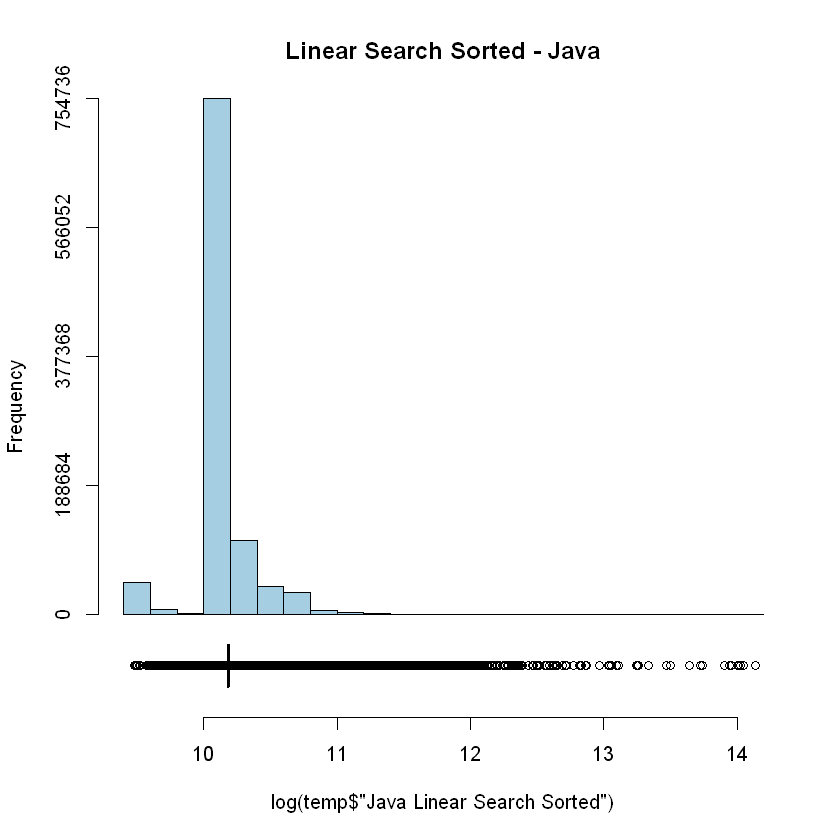

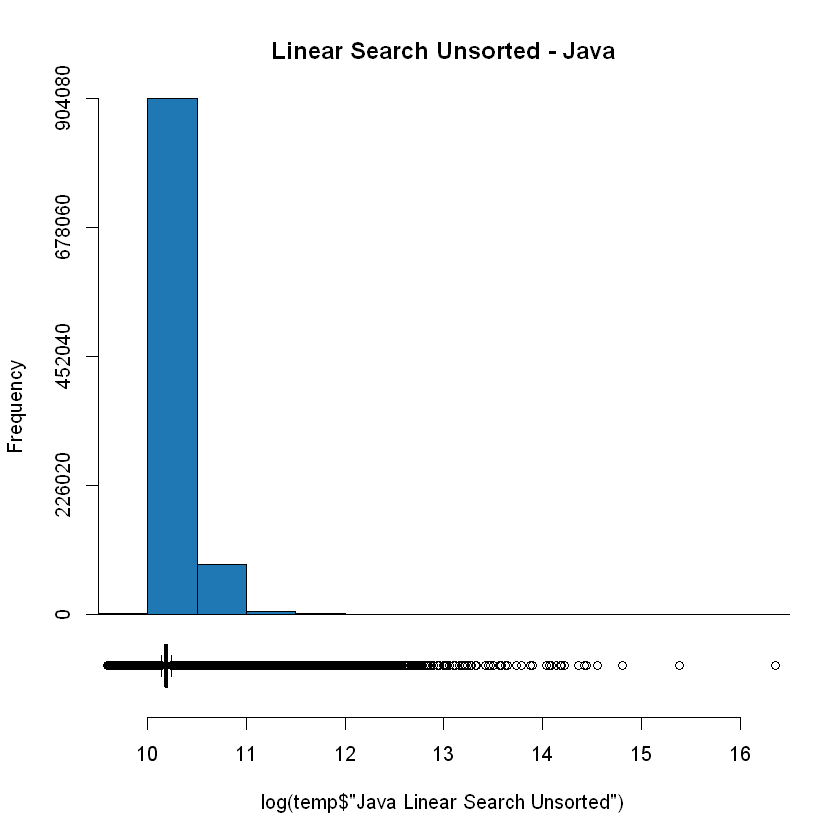

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 1 is not drawn"

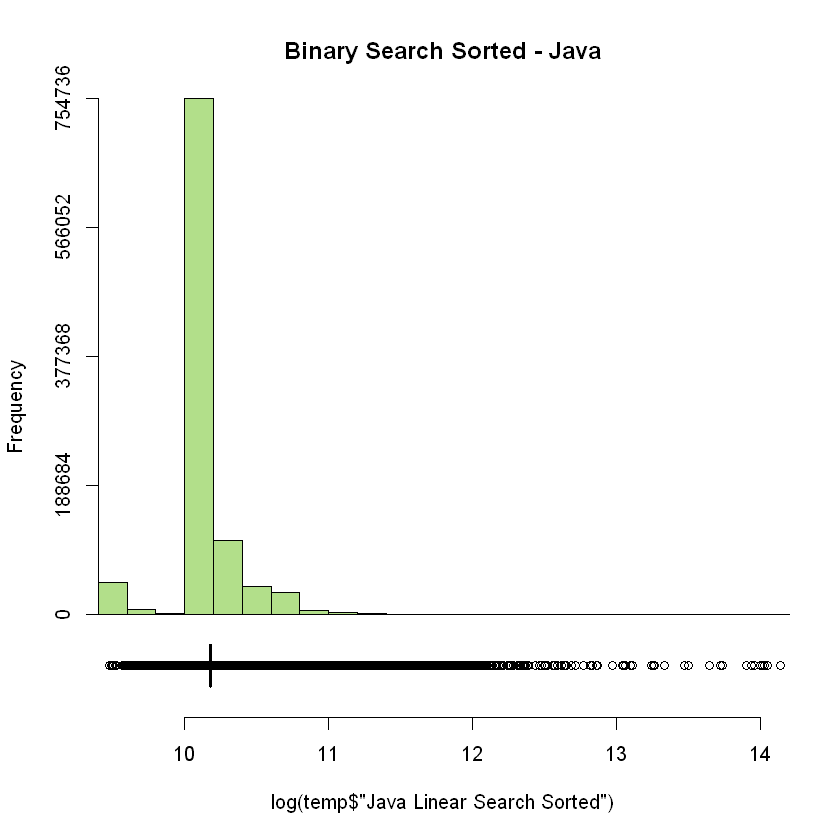

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 1 is not drawn"

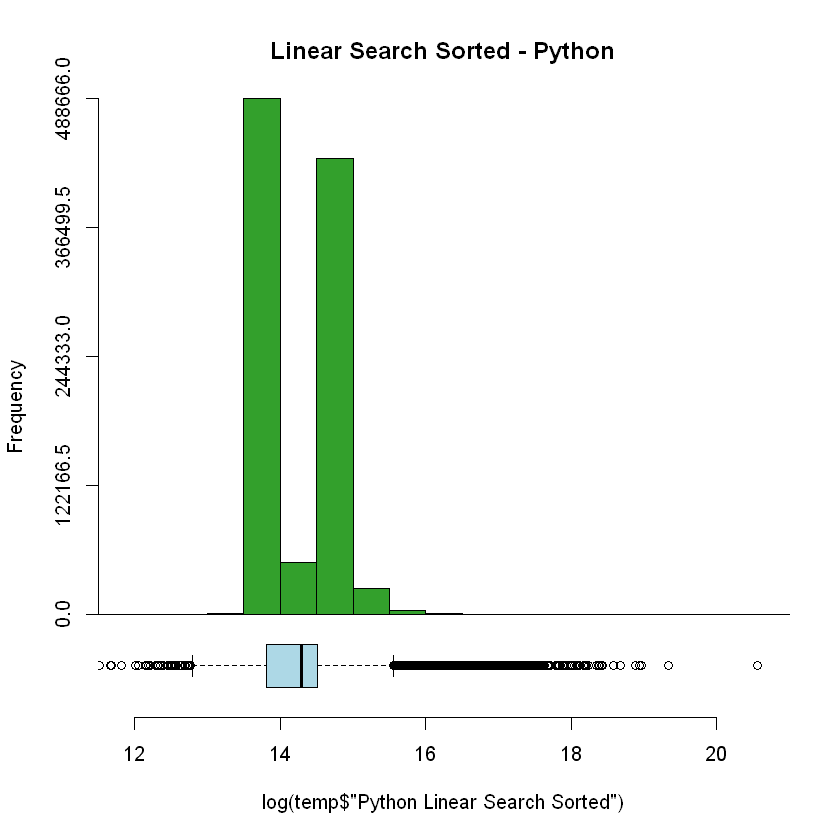

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 1 is not drawn"

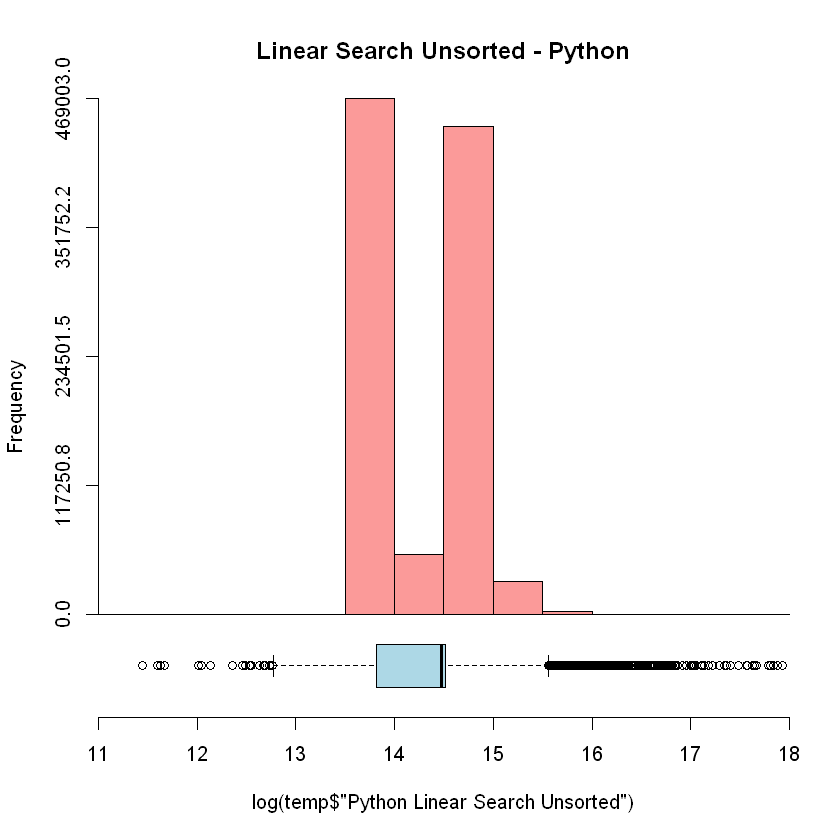

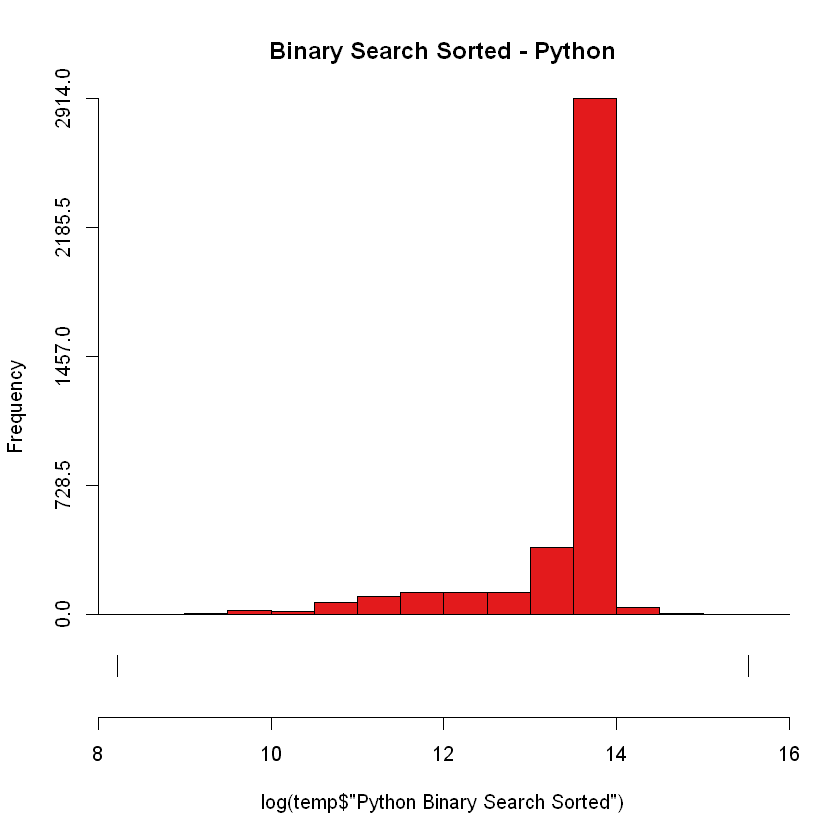

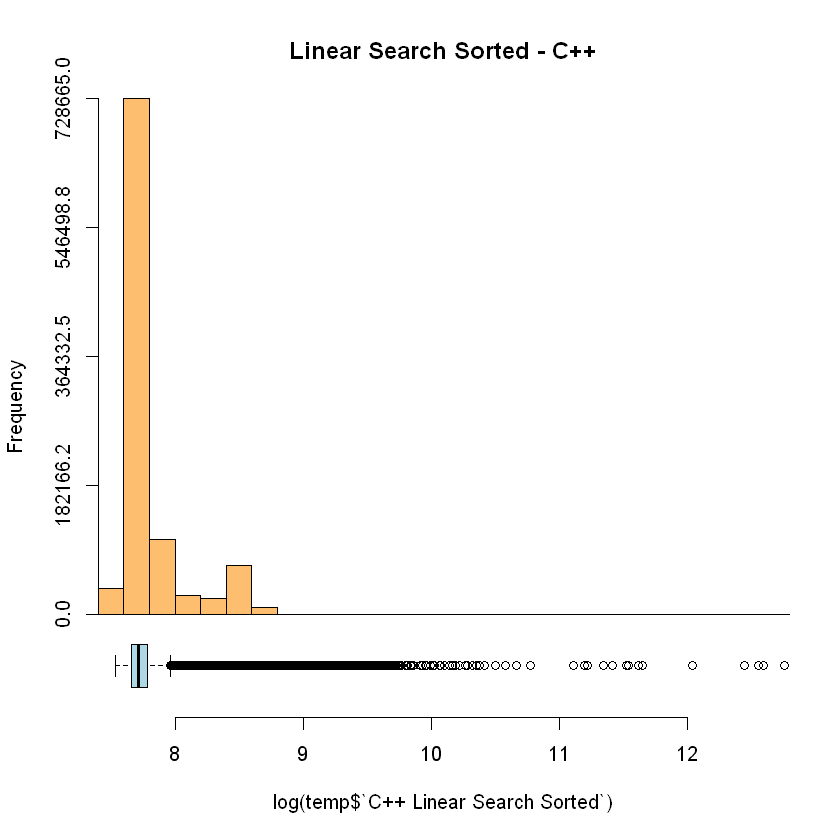

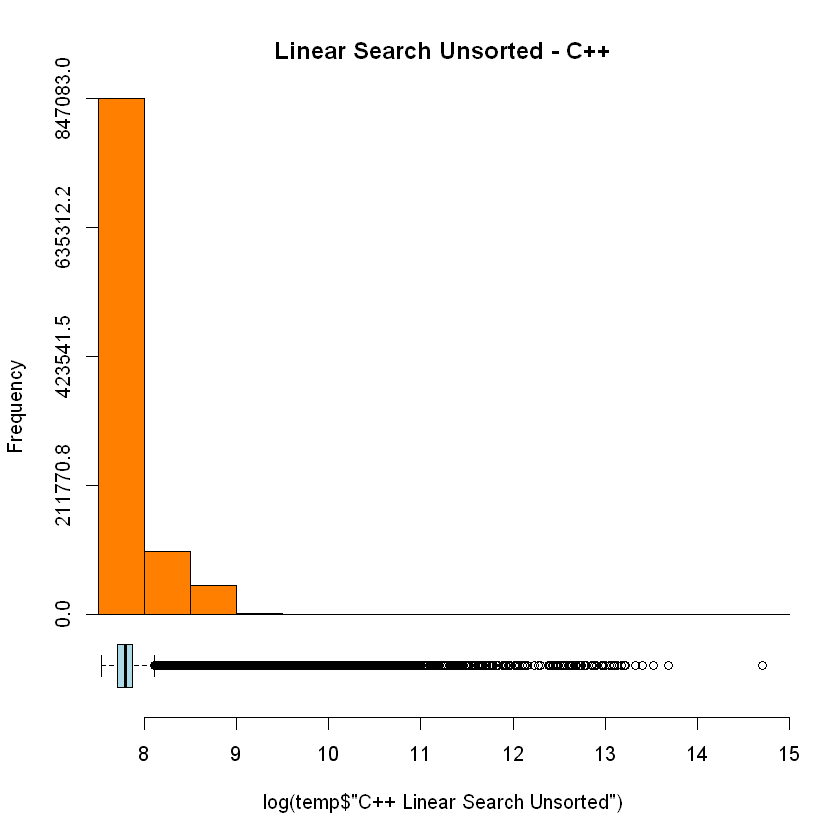

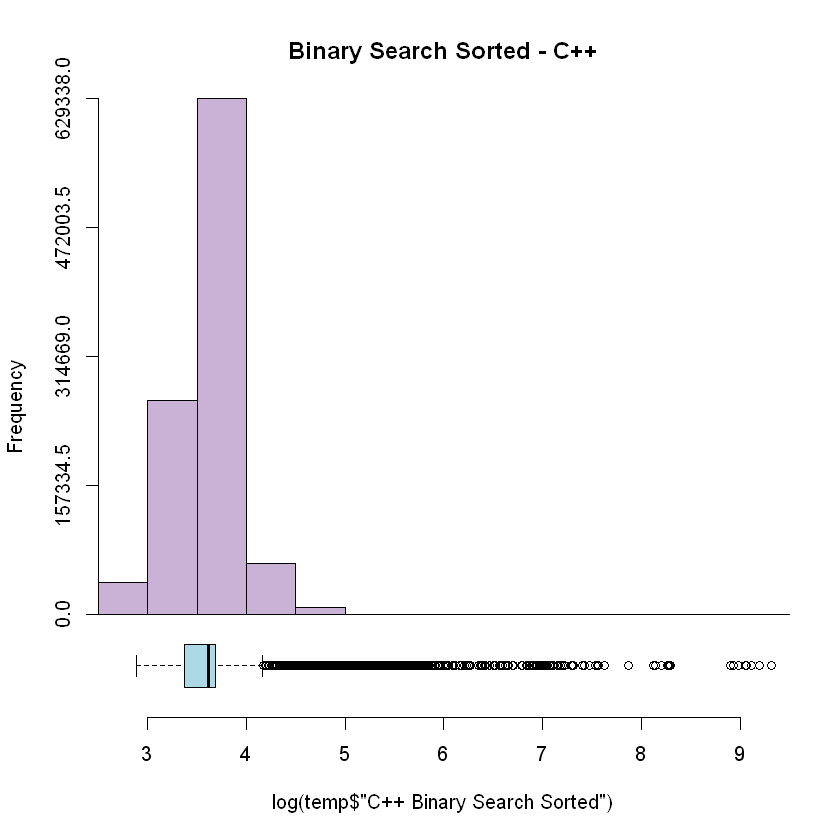

Warning message:
"Unknown or uninitialised column: 'Java.Search.Unsorted'."Warning message in mean.default(temp$Java.Search.Unsorted):
"argument is not numeric or logical: returning NA"

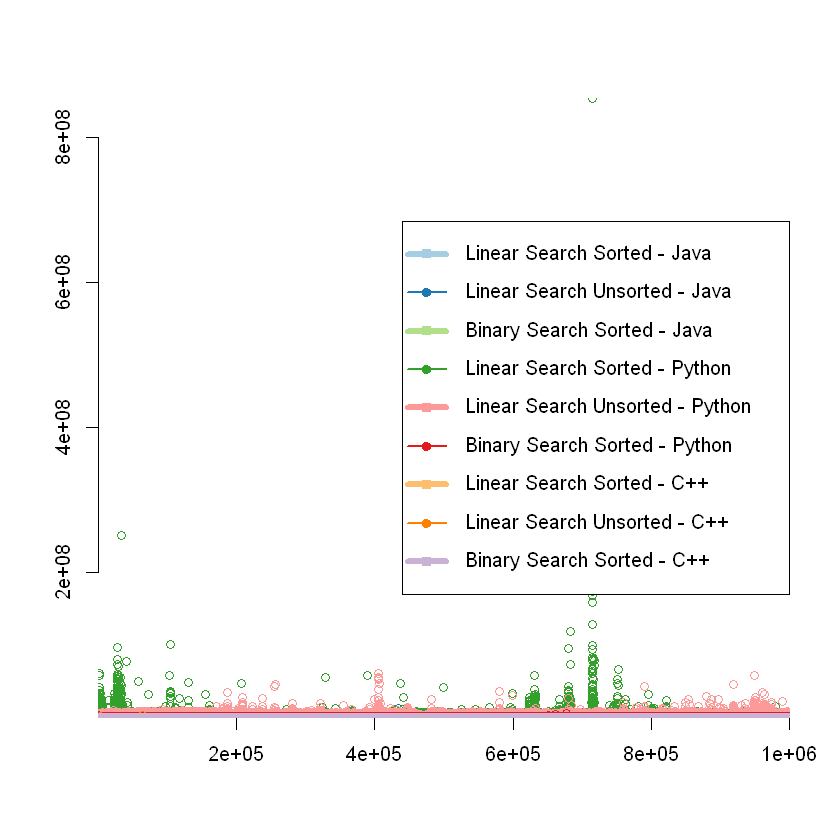

In [2]:
hist_boxplot(log(temp$'Java Linear Search Sorted'),col=colors[1],main="Linear Search Sorted - Java")
hist_boxplot(log(temp$'Java Linear Search Unsorted'),col=colors[2],main="Linear Search Unsorted - Java")
hist_boxplot(log(temp$'Java Linear Search Sorted'),col=colors[3],main="Binary Search Sorted - Java")
hist_boxplot(log(temp$'Python Linear Search Sorted'),col=colors[4],main="Linear Search Sorted - Python")
hist_boxplot(log(temp$'Python Linear Search Unsorted'),col=colors[5],main="Linear Search Unsorted - Python")
hist_boxplot(log(temp$'Python Binary Search Sorted'),col=colors[6],main="Binary Search Sorted - Python")
hist_boxplot(log(temp$`C++ Linear Search Sorted`),col=colors[7],main="Linear Search Sorted - C++")
hist_boxplot(log(temp$'C++ Linear Search Unsorted'),col=colors[8],main="Linear Search Unsorted - C++")
hist_boxplot(log(temp$'C++ Binary Search Sorted'),col=colors[9],main="Binary Search Sorted - C++")

plot(temp$`Run`,type = "p",col = colors[1], xlab = "Run Number", ylab = "Runtime in log(nanoseconds)", main = "Runtime for different algorithms", ylim=c(min(temp$'C++ Binary Search Sorted', na.rm = TRUE),max(temp$'Python Linear Search Sorted', na.rm = TRUE)))
abline(h=mean(temp$'Java Linear Search Sorted',na.rm = TRUE),col = colors[1],lwd=3)
lines(temp$'Java Linear Search Unsorted', type = "p", col = colors[2])
abline(h=mean(temp$Java.Search.Unsorted),col = colors[2],lwd=3)
lines(temp$'Java Linear Search Sorted', type = "p", col = colors[3])
abline(h=mean(temp$'Java Linear Search Sorted'),col = colors[3],lwd=3)
lines(temp$'Python Linear Search Sorted', type = "p", col = colors[4])
abline(h=mean(temp$'Python Linear Search Sorted'),col = colors[4],lwd=3)
lines(temp$'Python Linear Search Unsorted', type = "p", col = colors[5])
abline(h=mean(temp$'Python Linear Search Unsorted'),col = colors[5],lwd=3)
lines(temp$'Python Binary Search Sorted', type = "p", col = colors[6])
abline(h=mean(temp$'Python Binary Search Sorted'),col = colors[6],lwd=3)
lines(temp$`C++ Linear Search Sorted`, type = "p", col = colors[7])
abline(h=mean(temp$`C++ Linear Search Sorted`),col = colors[7],lwd=3)
lines(temp$'C++ Linear Search Unsorted', type = "p", col = colors[8])
abline(h=mean(temp$'C++ Linear Search Unsorted'),col = colors[8],lwd=3)
lines(temp$'C++ Binary Search Sorted', type = "p", col = colors[9])
abline(h=mean(temp$'C++ Binary Search Sorted'),col = colors[9],lwd=3)
legend("right",c("Linear Search Sorted - Java","Linear Search Unsorted - Java","Binary Search Sorted - Java", "Linear Search Sorted - Python","Linear Search Unsorted - Python","Binary Search Sorted - Python", "Linear Search Sorted - C++","Linear Search Unsorted - C++","Binary Search Sorted - C++"), lwd=c(5,2), col=colors, pch=c(15,19), y.intersp=1.5)

## Calculate Outliers

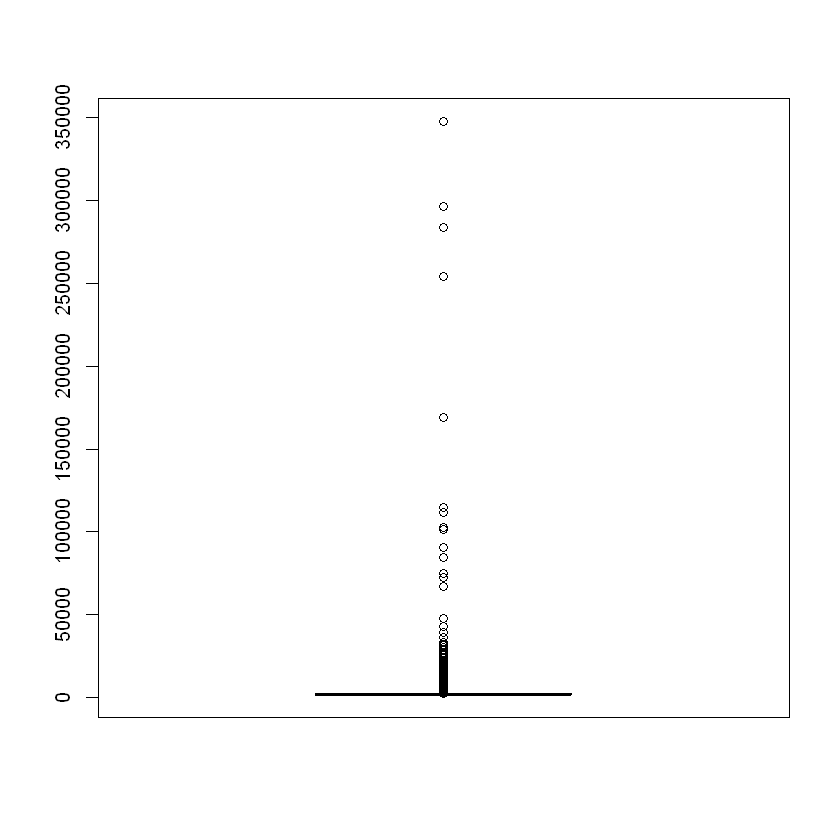

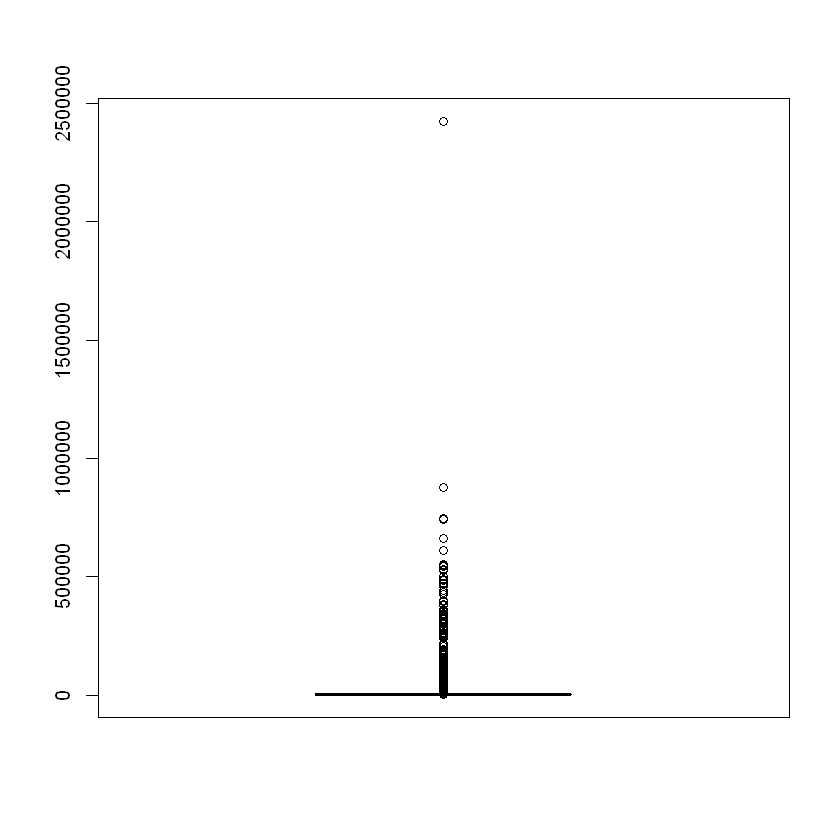

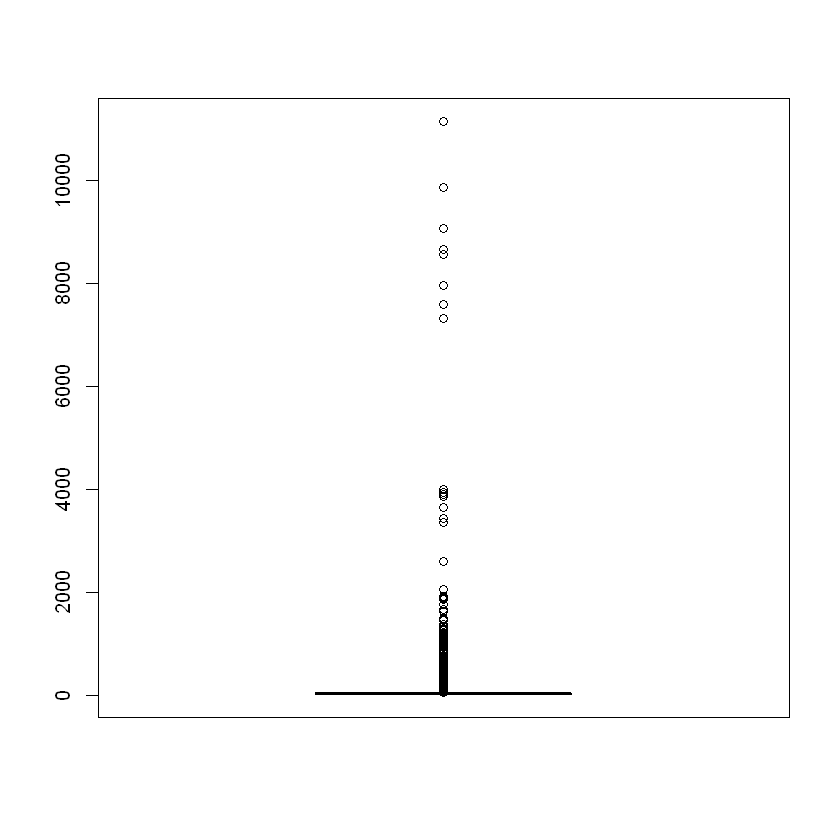

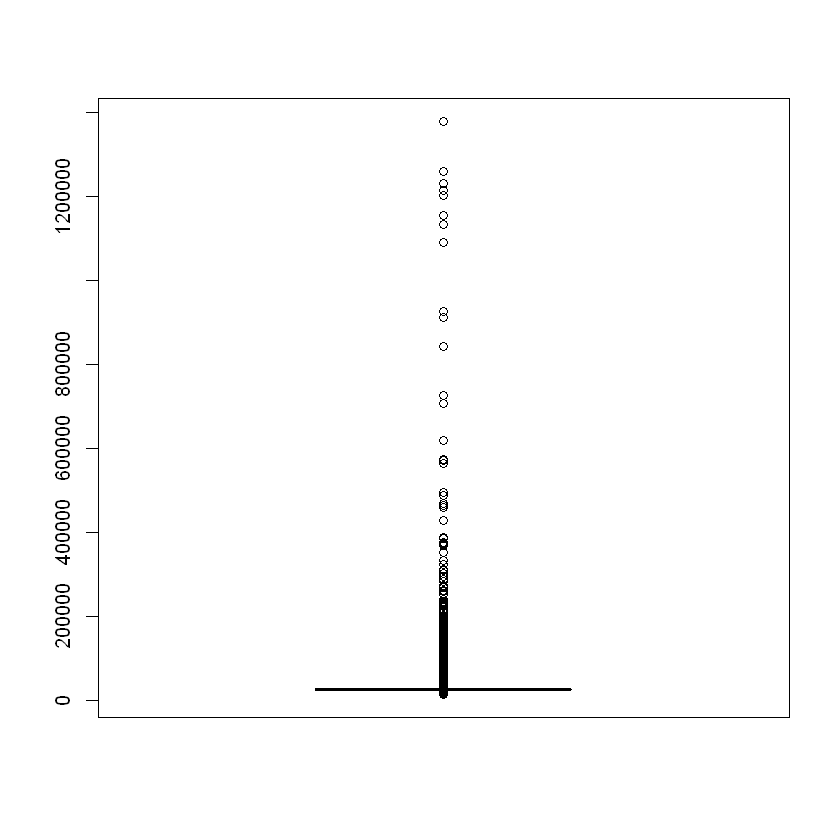

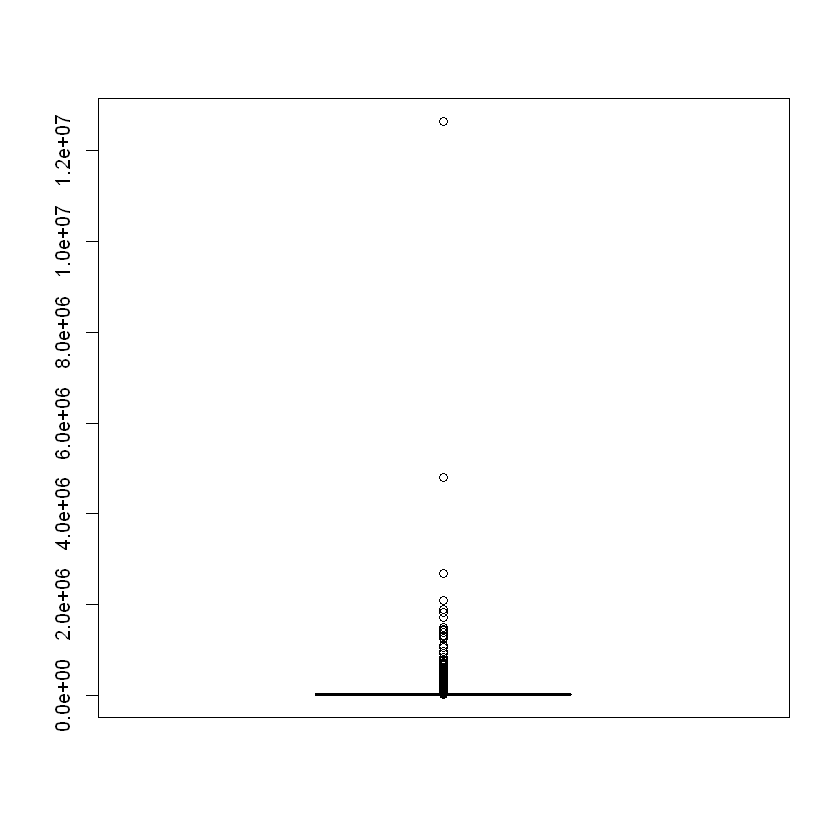

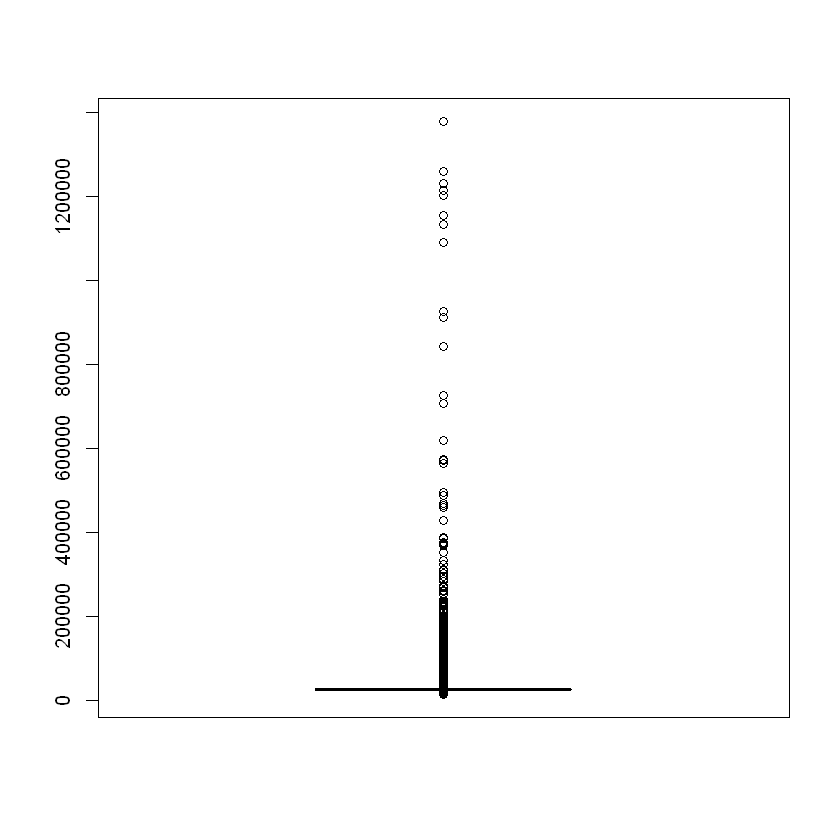

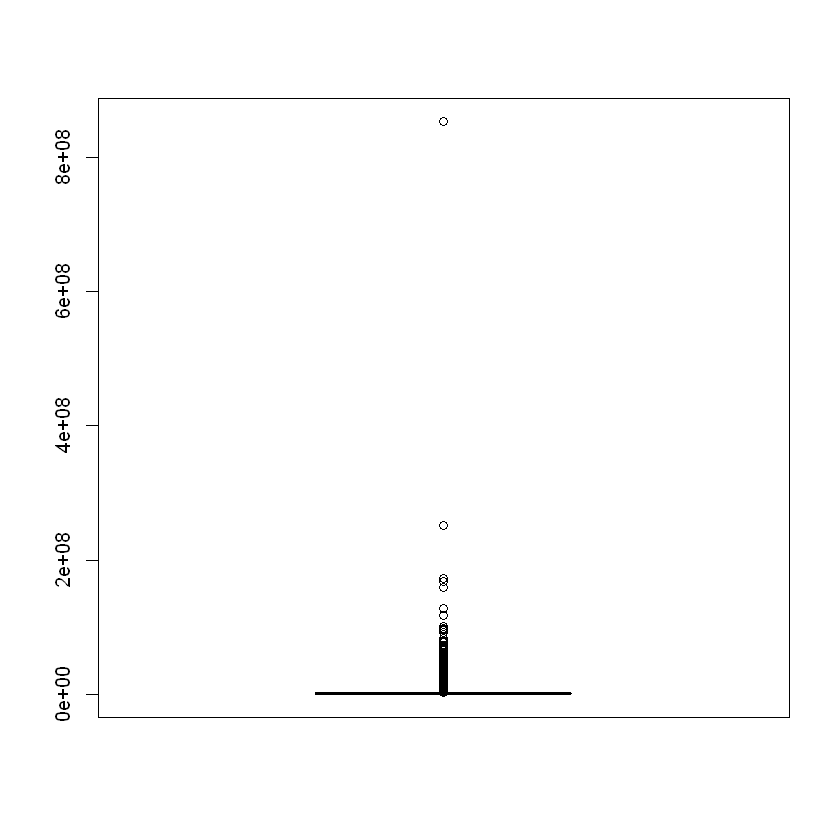

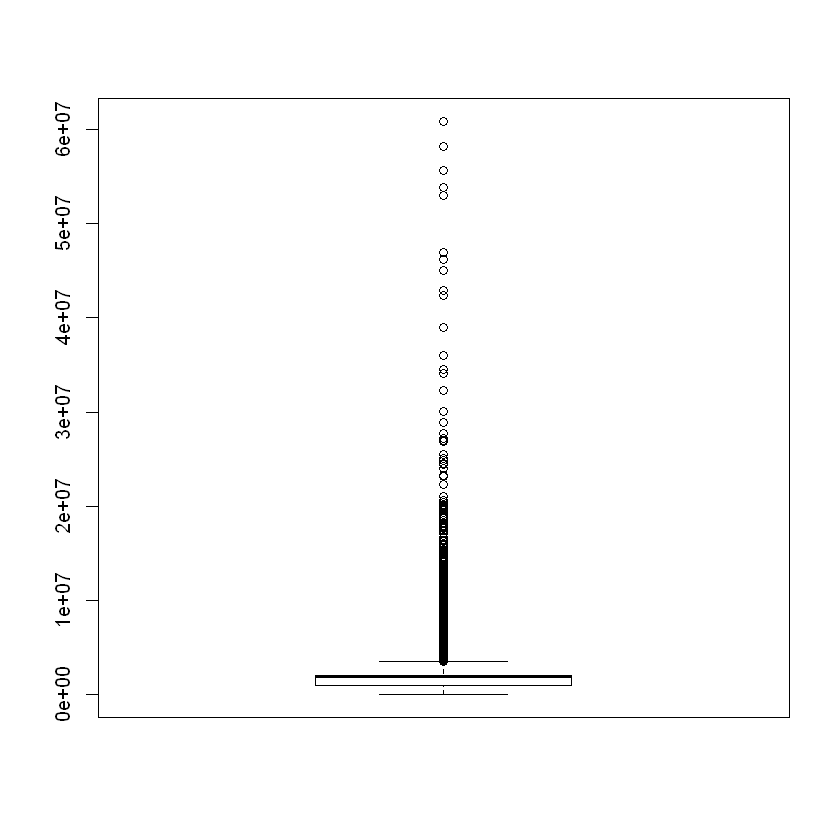

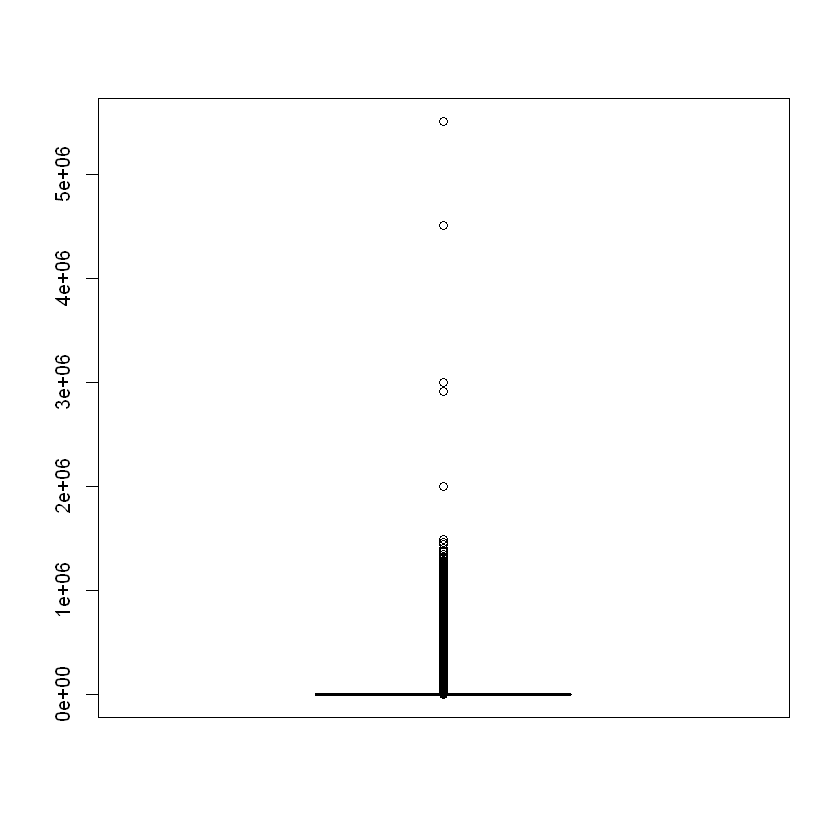

In [3]:
outliers <- boxplot(temp$`C++ Linear Search Sorted`, na.rm = TRUE)$out
Linear.Search.Sorted.NoOutliers <- temp$`C++ Linear Search Sorted`[-which(temp$`C++ Linear Search Sorted` %in% outliers)]
outliers <- boxplot(temp$'C++ Linear Search Unsorted', na.rm = TRUE)$out
Linear.Search.Unsorted.NoOutliers <- temp$'C++ Linear Search Unsorted'[-which(temp$'C++ Linear Search Unsorted' %in% outliers)]
outliers <- boxplot(temp$'C++ Binary Search Sorted', na.rm = TRUE)$out
Binary.Search.Sorted.NoOutliers <- temp$'C++ Binary Search Sorted'[-which(temp$'C++ Binary Search Sorted' %in% outliers)]

outliers <- boxplot(temp$'Java Linear Search Sorted', na.rm = TRUE)$out
Java.Linear.Search.Sorted.NoOutliers <- temp$`Java Linear Search Sorted`[-which(temp$`Java Linear Search Sorted` %in% outliers)]
outliers <- boxplot(temp$'Java Linear Search Unsorted', na.rm = TRUE)$out
Java.Linear.Search.Unsorted.NoOutliers <- temp$'Java Linear Search Unsorted'[-which(temp$'Java Linear Search Unsorted' %in% outliers)]
outliers <- boxplot(temp$'Java Linear Search Sorted', na.rm = TRUE)$out
Java.Binary.Search.Sorted.NoOutliers <- temp$'Java Linear Search Sorted'[-which(temp$'Java Linear Search Sorted' %in% outliers)]

outliers <- boxplot(temp$'Python Linear Search Sorted', na.rm = TRUE)$out
Python.Linear.Search.Sorted.NoOutliers <- temp$'Python Linear Search Sorted'[-which(temp$'Python Linear Search Sorted' %in% outliers)]
outliers <- boxplot(temp$'Python Linear Search Unsorted', na.rm = TRUE)$out
Python.Linear.Search.Unsorted.NoOutliers <- temp$'Python Linear Search Unsorted'[-which(temp$'Python Linear Search Unsorted' %in% outliers)]
outliers <- boxplot(temp$'Python Binary Search Sorted', na.rm = TRUE)$out
Python.Binary.Search.Sorted.NoOutliers <- temp$'Python Binary Search Sorted'[-which(temp$'Python Binary Search Sorted' %in% outliers)]

## Display Data Without Outliers

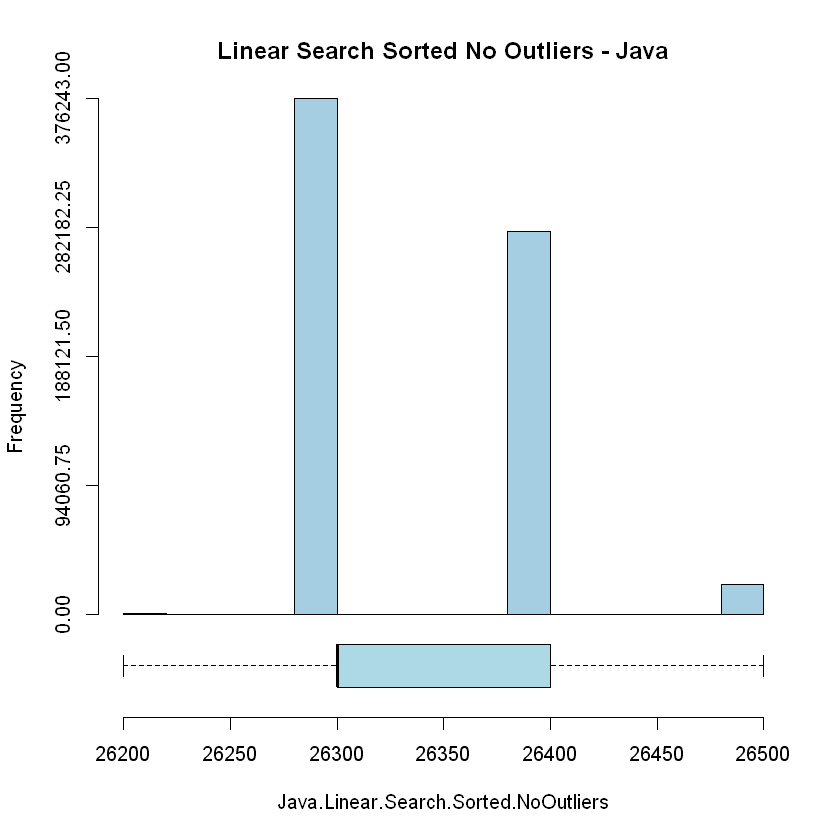

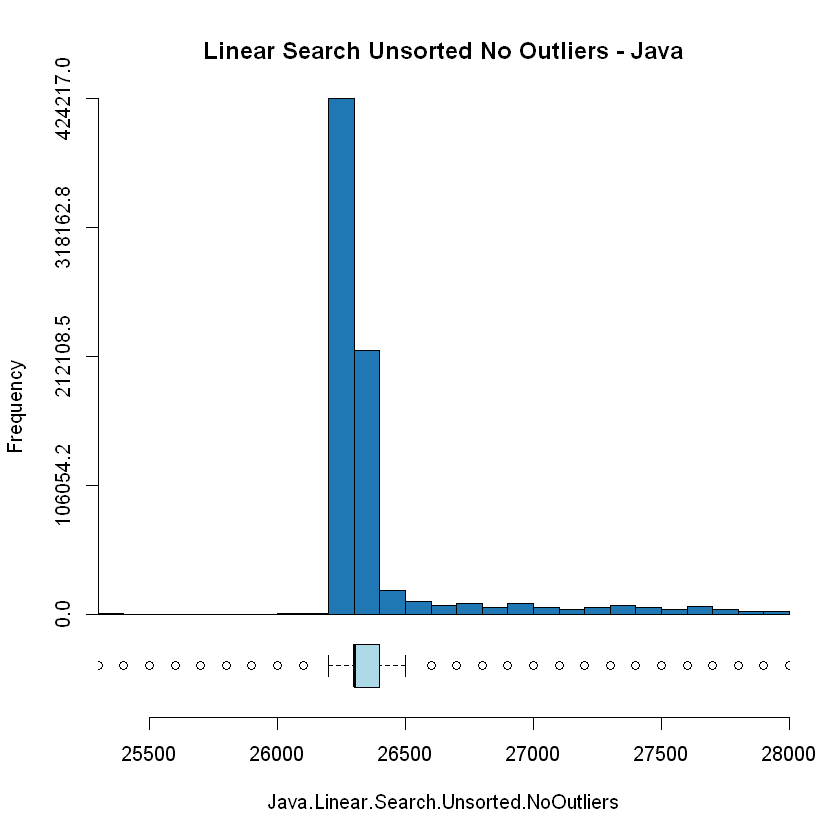

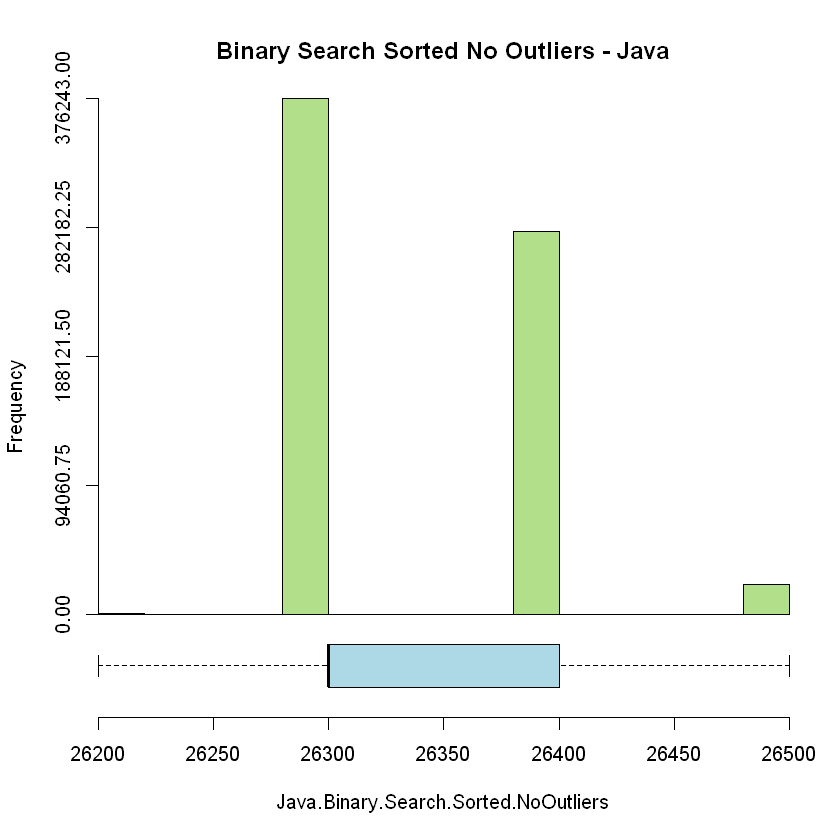

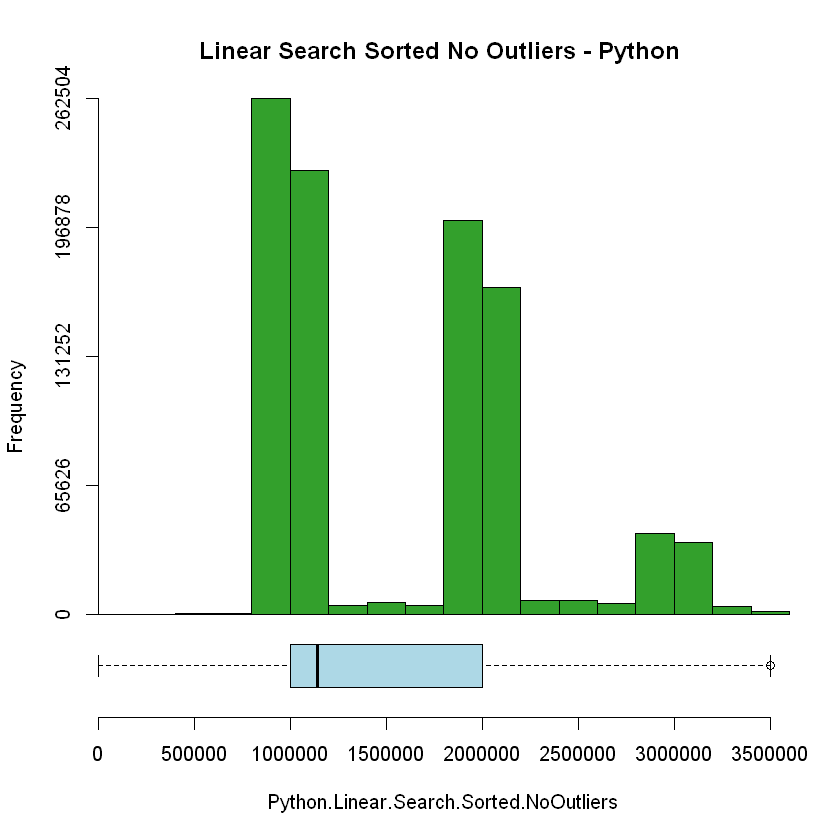

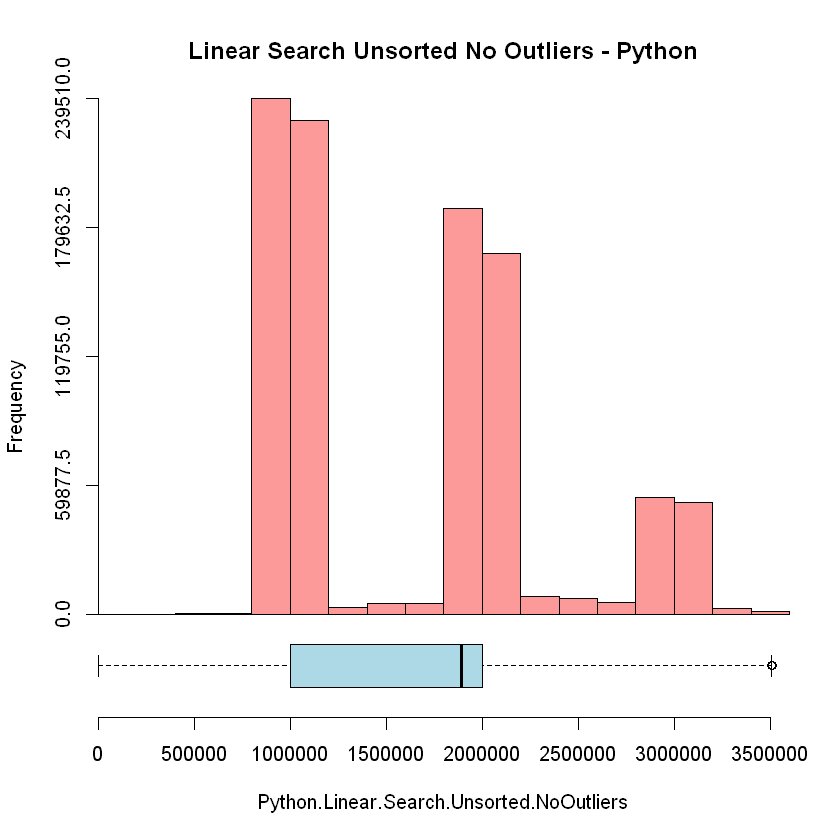

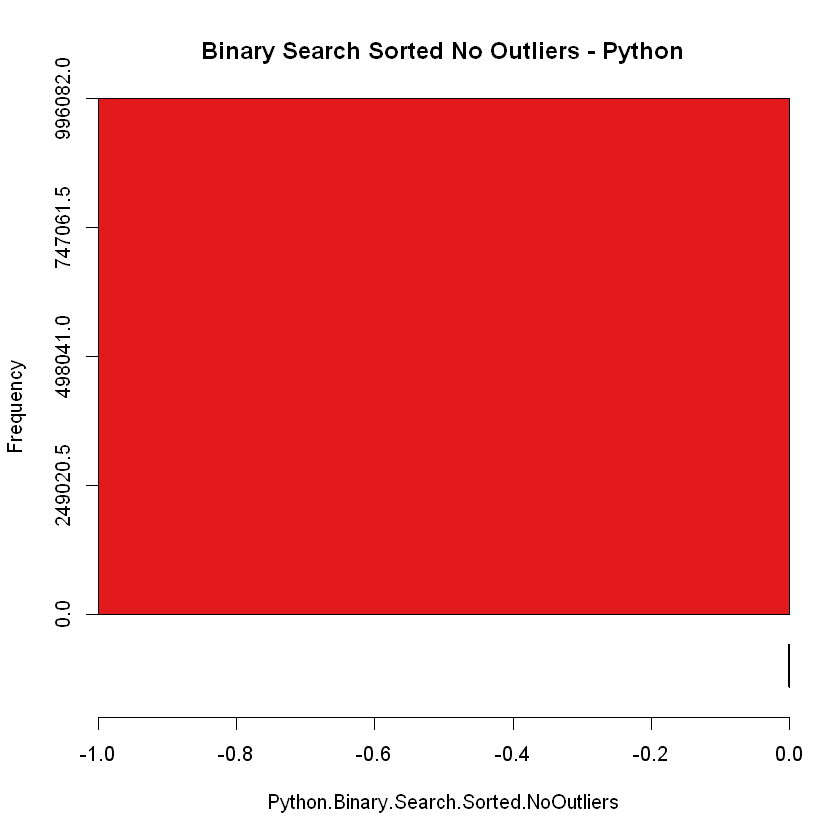

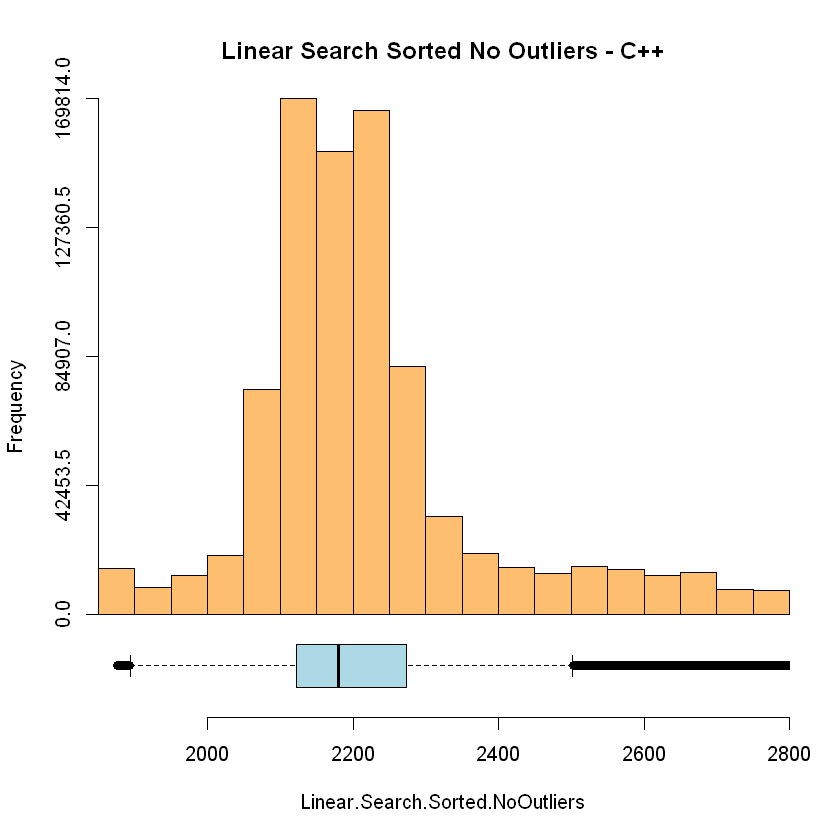

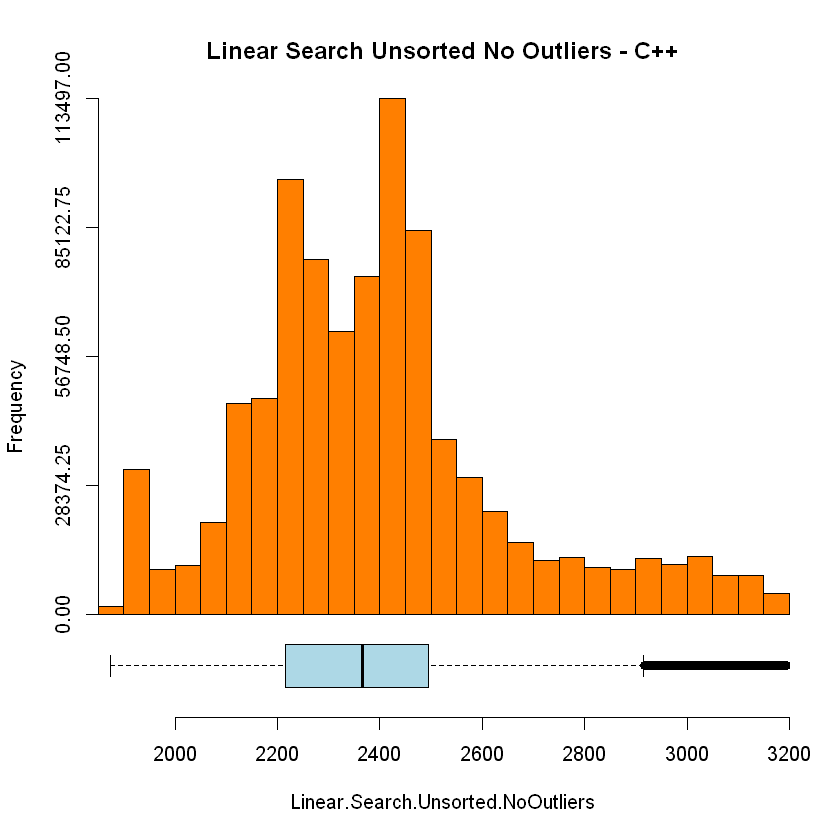

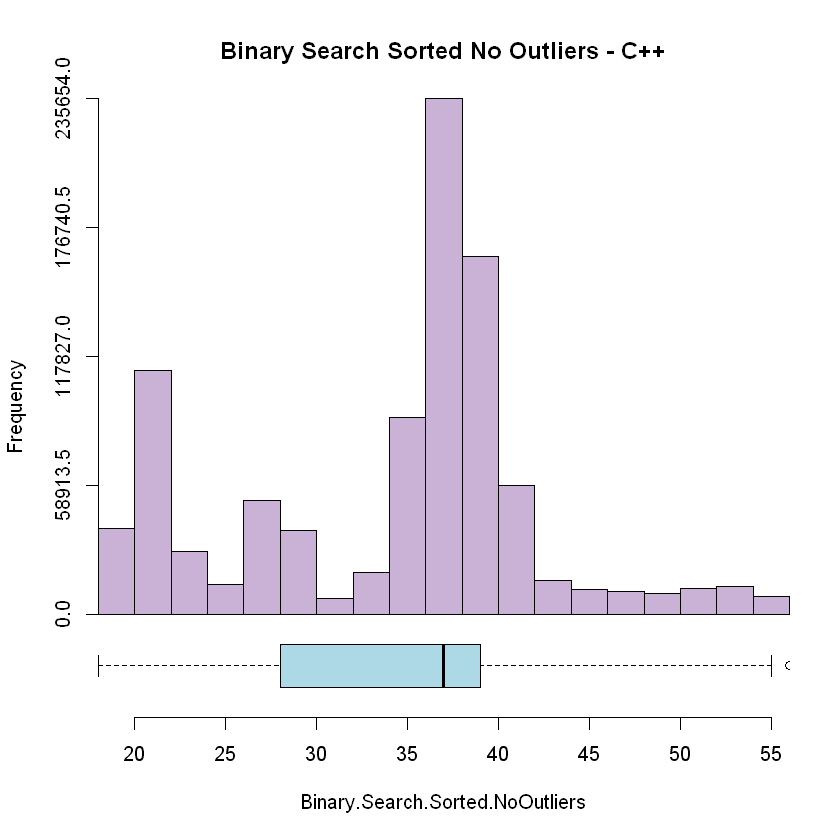

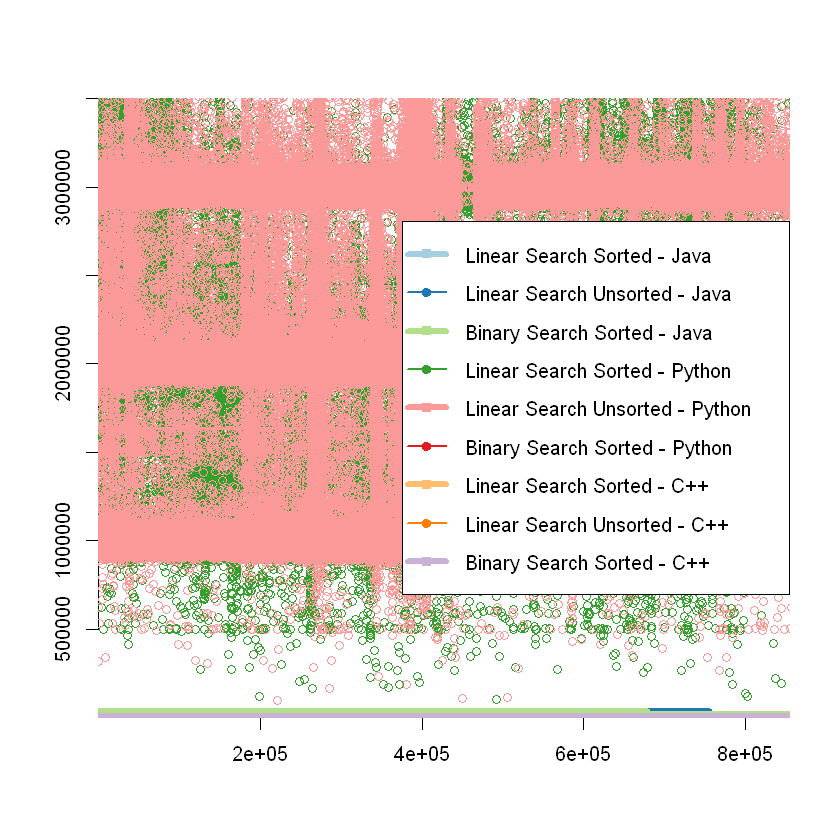

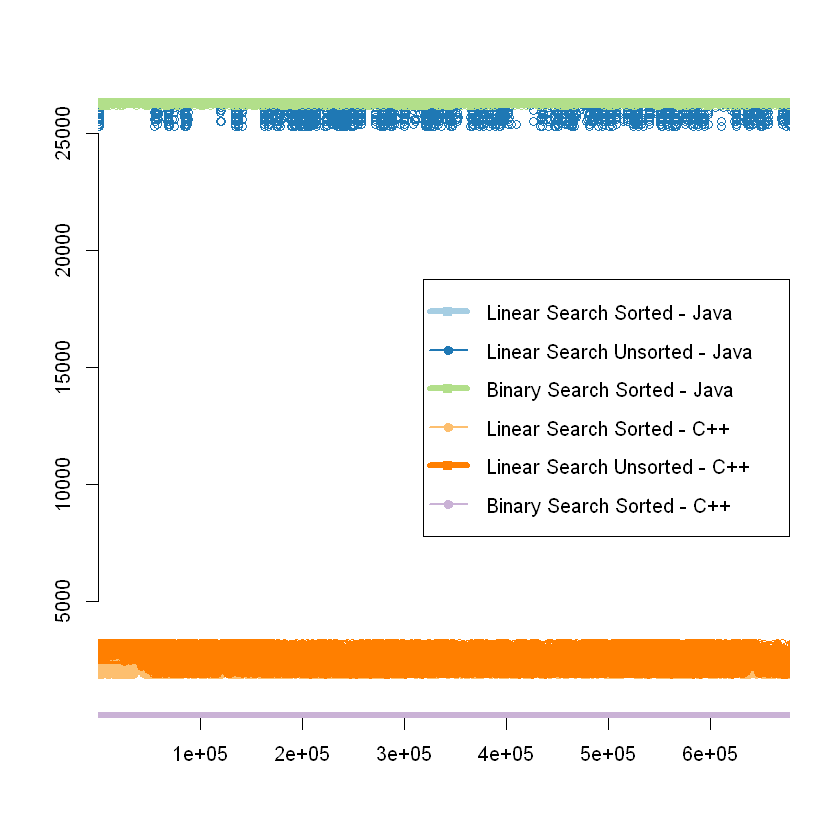

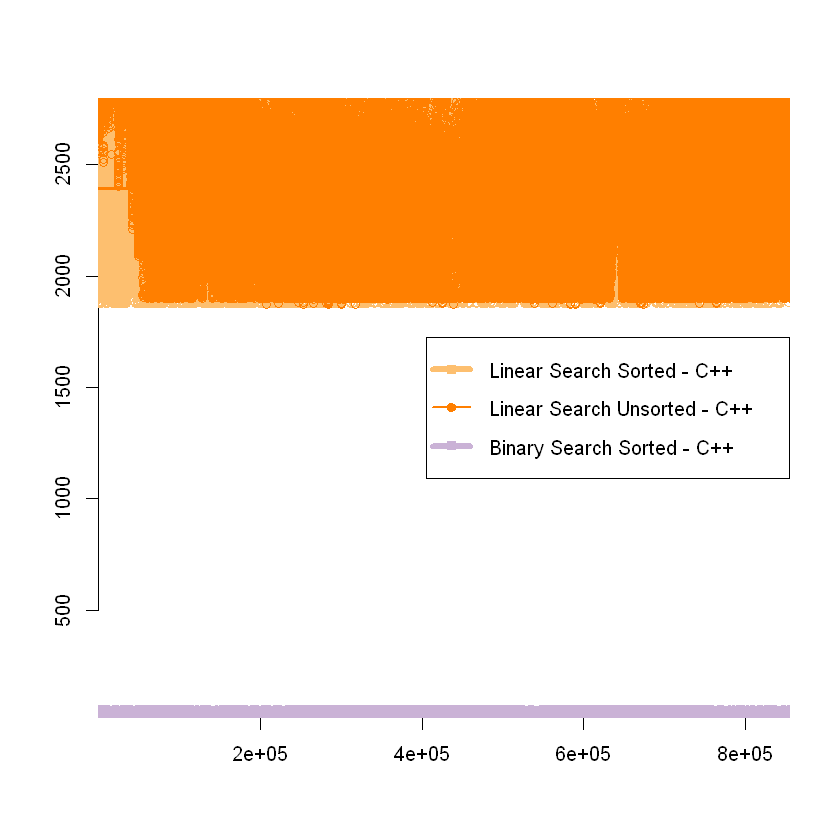

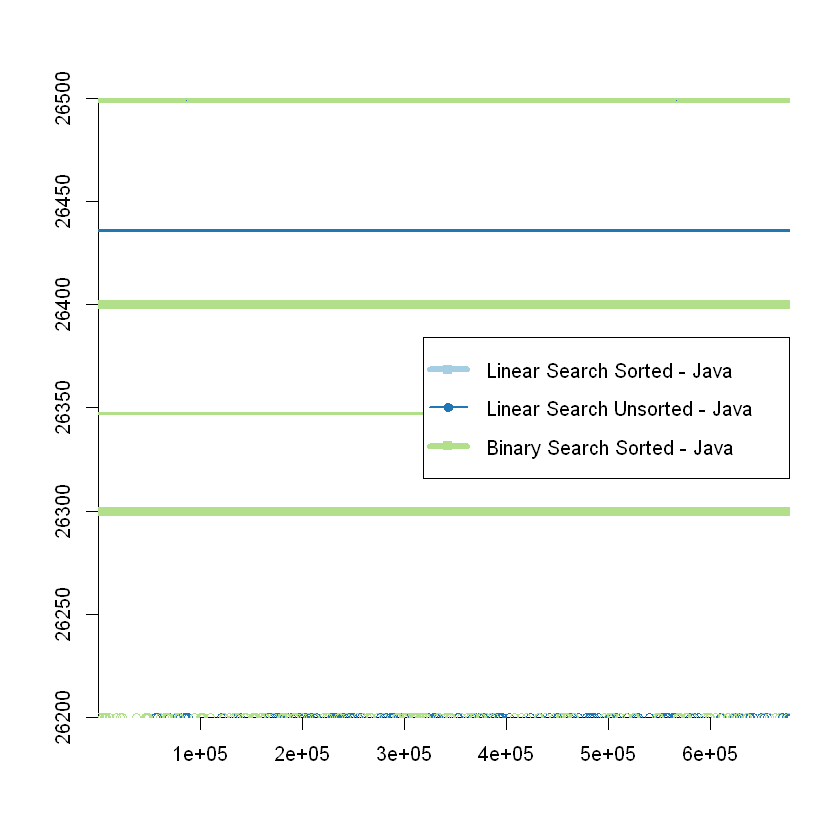

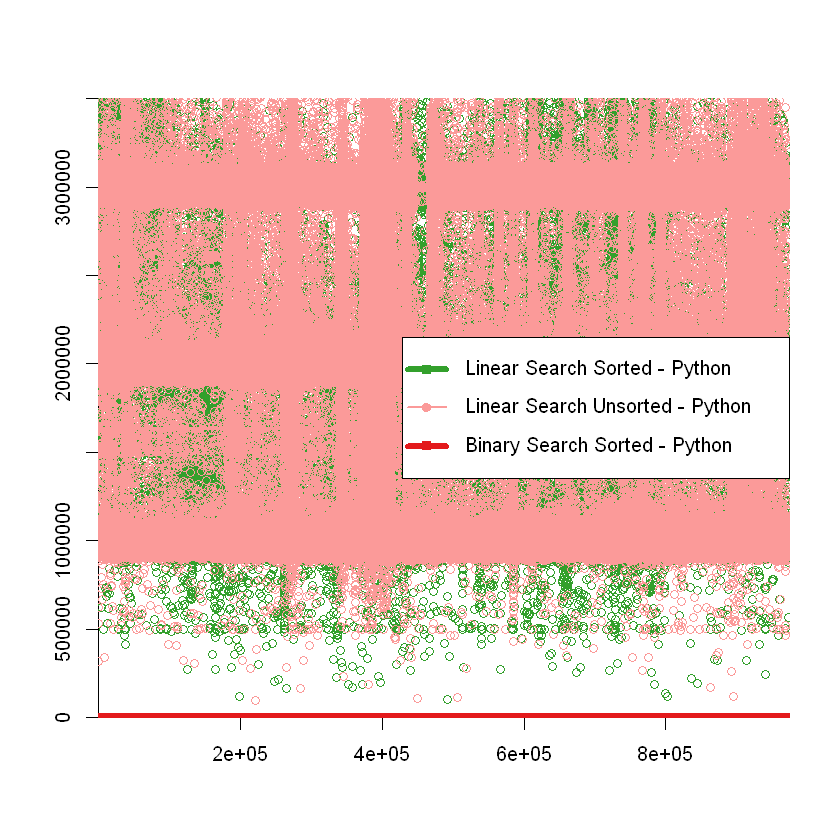

In [4]:
hist_boxplot(Java.Linear.Search.Sorted.NoOutliers,col=colors[1],main="Linear Search Sorted No Outliers - Java")
hist_boxplot(Java.Linear.Search.Unsorted.NoOutliers,col=colors[2],main="Linear Search Unsorted No Outliers - Java")
hist_boxplot(Java.Binary.Search.Sorted.NoOutliers,col=colors[3],main="Binary Search Sorted No Outliers - Java")

hist_boxplot(Python.Linear.Search.Sorted.NoOutliers,col=colors[4],main="Linear Search Sorted No Outliers - Python ")
hist_boxplot(Python.Linear.Search.Unsorted.NoOutliers,col=colors[5],main="Linear Search Unsorted No Outliers - Python")
hist_boxplot(Python.Binary.Search.Sorted.NoOutliers,col=colors[6],main="Binary Search Sorted No Outliers - Python")

hist_boxplot(Linear.Search.Sorted.NoOutliers,col=colors[7],main="Linear Search Sorted No Outliers - C++")
hist_boxplot(Linear.Search.Unsorted.NoOutliers,col=colors[8],main="Linear Search Unsorted No Outliers - C++")
hist_boxplot(Binary.Search.Sorted.NoOutliers,col=colors[9],main="Binary Search Sorted No Outliers - C++")

plot(Linear.Search.Sorted.NoOutliers,type = "p",col = colors[1], xlab = "Run Number", ylab = "Runtime in log(nanoseconds)", main = "Runtime for different algorithms", ylim=c(min(Binary.Search.Sorted.NoOutliers, na.rm=TRUE),max(Python.Linear.Search.Sorted.NoOutliers, na.rm=TRUE)))
abline(h=mean(Java.Linear.Search.Sorted.NoOutliers),col = colors[1],lwd=3)
lines(Java.Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[2])
abline(h=mean(Java.Linear.Search.Unsorted.NoOutliers),col = colors[2],lwd=3)
lines(Java.Binary.Search.Sorted.NoOutliers, type = "p", col = colors[3])
abline(h=mean(Java.Binary.Search.Sorted.NoOutliers),col = colors[3],lwd=3)
lines(Python.Linear.Search.Sorted.NoOutliers, type = "p", col = colors[4])
abline(h=mean(Python.Linear.Search.Sorted.NoOutliers),col = colors[4],lwd=3)
lines(Python.Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[5])
abline(h=mean(Python.Linear.Search.Unsorted.NoOutliers),col = colors[5],lwd=3)
lines(Python.Binary.Search.Sorted.NoOutliers, type = "p", col = colors[6])
abline(h=mean(Python.Binary.Search.Sorted.NoOutliers),col = colors[6],lwd=3)
lines(Linear.Search.Sorted.NoOutliers, type = "p", col = colors[7])
abline(h=mean(Linear.Search.Sorted.NoOutliers),col = colors[7],lwd=3)
lines(Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[8])
abline(h=mean(Linear.Search.Unsorted.NoOutliers),col = colors[8],lwd=3)
lines(Binary.Search.Sorted.NoOutliers, type = "p", col = colors[9])
abline(h=mean(Binary.Search.Sorted.NoOutliers),col = colors[9],lwd=3)
legend("right",c("Linear Search Sorted - Java","Linear Search Unsorted - Java","Binary Search Sorted - Java", "Linear Search Sorted - Python","Linear Search Unsorted - Python","Binary Search Sorted - Python", "Linear Search Sorted - C++","Linear Search Unsorted - C++","Binary Search Sorted - C++"), lwd=c(5,2), col=colors, pch=c(15,19), y.intersp=1.5)

plot(Java.Linear.Search.Sorted.NoOutliers,type = "p",col = colors[1], xlab = "Run Number", ylab = "Runtime in log(nanoseconds)", main = "Runtime for different algorithms", ylim=c(min(Binary.Search.Sorted.NoOutliers, na.rm=TRUE),max(Java.Linear.Search.Sorted.NoOutliers, na.rm=TRUE)))
abline(h=mean(Java.Linear.Search.Sorted.NoOutliers),col = colors[1],lwd=3)
lines(Java.Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[2])
abline(h=mean(Java.Linear.Search.Unsorted.NoOutliers),col = colors[2],lwd=3)
lines(Java.Binary.Search.Sorted.NoOutliers, type = "p", col = colors[3])
abline(h=mean(Java.Binary.Search.Sorted.NoOutliers),col = colors[3],lwd=3)
lines(Linear.Search.Sorted.NoOutliers, type = "p", col = colors[7])
abline(h=mean(Linear.Search.Sorted.NoOutliers),col = colors[7],lwd=3)
lines(Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[8])
abline(h=mean(Linear.Search.Unsorted.NoOutliers),col = colors[8],lwd=3)
lines(Binary.Search.Sorted.NoOutliers, type = "p", col = colors[9])
abline(h=mean(Binary.Search.Sorted.NoOutliers),col = colors[9],lwd=3)
legend("right",c("Linear Search Sorted - Java","Linear Search Unsorted - Java","Binary Search Sorted - Java",  "Linear Search Sorted - C++","Linear Search Unsorted - C++","Binary Search Sorted - C++"), lwd=c(5,2), col=c(colors[1],colors[2],colors[3],colors[7],colors[8],colors[9]), pch=c(15,19), y.intersp=1.5)

plot(Linear.Search.Sorted.NoOutliers,type = "p",col = colors[7], xlab = "Run Number", ylab = "Runtime in log(nanoseconds)", main = "Runtime for different algorithms", ylim=c(min(Binary.Search.Sorted.NoOutliers, na.rm=TRUE),max(Linear.Search.Sorted.NoOutliers, na.rm=TRUE)))
lines(Linear.Search.Sorted.NoOutliers, type = "p", col = colors[7])
abline(h=mean(Linear.Search.Sorted.NoOutliers),col = colors[7],lwd=3)
lines(Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[8])
abline(h=mean(Linear.Search.Unsorted.NoOutliers),col = colors[8],lwd=3)
lines(Binary.Search.Sorted.NoOutliers, type = "p", col = colors[9])
abline(h=mean(Binary.Search.Sorted.NoOutliers),col = colors[9],lwd=3)
legend("right",c("Linear Search Sorted - C++","Linear Search Unsorted - C++","Binary Search Sorted - C++"), lwd=c(5,2), col=c(colors[7],colors[8],colors[9]), pch=c(15,19), y.intersp=1.5)

plot(Java.Linear.Search.Sorted.NoOutliers,type = "p",col = colors[1], xlab = "Run Number", ylab = "Runtime in log(nanoseconds)", main = "Runtime for different algorithms", ylim=c(min(Java.Binary.Search.Sorted.NoOutliers, na.rm=TRUE),max(Java.Linear.Search.Sorted.NoOutliers, na.rm=TRUE)))
abline(h=mean(Java.Linear.Search.Sorted.NoOutliers),col = colors[1],lwd=3)
lines(Java.Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[2])
abline(h=mean(Java.Linear.Search.Unsorted.NoOutliers),col = colors[2],lwd=3)
lines(Java.Binary.Search.Sorted.NoOutliers, type = "p", col = colors[3])
abline(h=mean(Java.Binary.Search.Sorted.NoOutliers),col = colors[3],lwd=3)
legend("right",c("Linear Search Sorted - Java","Linear Search Unsorted - Java","Binary Search Sorted - Java"), lwd=c(5,2), col=c(colors[1],colors[2],colors[3]), pch=c(15,19), y.intersp=1.5)

plot(Python.Linear.Search.Sorted.NoOutliers,type = "p",col = colors[4], xlab = "Run Number", ylab = "Runtime in log(nanoseconds)", main = "Runtime for different algorithms", ylim=c(min(Python.Binary.Search.Sorted.NoOutliers, na.rm=TRUE),max(Python.Linear.Search.Sorted.NoOutliers, na.rm=TRUE)))
lines(Python.Linear.Search.Sorted.NoOutliers, type = "p", col = colors[4])
abline(h=mean(Python.Linear.Search.Sorted.NoOutliers),col = colors[4],lwd=3)
lines(Python.Linear.Search.Unsorted.NoOutliers, type = "p", col = colors[5])
abline(h=mean(Python.Linear.Search.Unsorted.NoOutliers),col = colors[5],lwd=3)
lines(Python.Binary.Search.Sorted.NoOutliers, type = "p", col = colors[6])
abline(h=mean(Python.Binary.Search.Sorted.NoOutliers),col = colors[6],lwd=3)
legend("right",c("Linear Search Sorted - Python","Linear Search Unsorted - Python","Binary Search Sorted - Python"), lwd=c(5,2), col=c(colors[4],colors[5],colors[6]), pch=c(15,19), y.intersp=1.5)